In [1]:
!pip install gensim


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install pymorphy2


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:

from tqdm.notebook import tqdm
import numpy as np
import gensim

C:\conda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\conda\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\conda\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
import nltk
import nltk.data

In [5]:
stop_words = open("russian", 'r', encoding='utf-8').read()

In [6]:
from tqdm import tqdm

In [7]:
import pymorphy2

morph = pymorphy2.MorphAnalyzer()

In [8]:
import pandas as pd

sentences = []
data = []

tqdm.pandas()

df = pd.read_csv('full_corpus.csv')

In [9]:
import codecs
import os

In [10]:
from sklearn.decomposition import LatentDirichletAllocation

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
NUM_TOPICS = 10
N_FIRST = 10 # сколько первых слов на тему выводить
MIN_DF = 3 # минимальное число вхождений слова в документ, чтобы мы его учитывали (включали в вектор документа)
MAX_DF = 0.99 # в каком проценте документов должно присутствовать слово, чтобы оно не рассматривалось

In [13]:
column = str(input())

Текст


In [14]:
df[column] = df[column].astype(str)

In [15]:
count_vectorizer = CountVectorizer(min_df=MIN_DF, max_df=MAX_DF, stop_words = [w for w in stop_words.split('\n')])
data_count_vectorized = count_vectorizer.fit_transform(df[column])

In [16]:
lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='batch', batch_size=512, random_state = 2)
lda_model.fit_transform(data_count_vectorized);

In [17]:
all = []

# print function
def print_topics(model, vectorizer, top_n=N_FIRST):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        all.append([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])

In [18]:
print_topics(lda_model, count_vectorizer)

Topic 0:


C:\conda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[('федерации', 10421.079932645398), ('медицинской', 6259.775051348632), ('организации', 5086.507239738019), ('помощи', 4312.82446849782), ('образования', 4289.8895509993245), ('средств', 3945.854197034307), ('соответствии', 3371.5517212792665), ('средства', 3354.9225896935254), ('также', 2627.33939116085), ('сфере', 2600.669377749637)]
Topic 1:
[('федерации', 22269.5960218733), ('статьи', 8629.114074623043), ('суда', 7228.179620123895), ('года', 5640.9311375343095), ('закона', 5273.177581380794), ('федерального', 4876.7441712587515), ('суд', 4838.239664498167), ('части', 4366.423809792758), ('часть', 3786.606492359683), ('статья', 3323.898337876931)]
Topic 2:
[('федерации', 6873.547339313004), ('строительства', 4470.847525867885), ('объектов', 3652.3942985793374), ('ст', 3606.520351092114), ('статьи', 3291.5173136557923), ('соответствии', 2776.790434616314), ('федерального', 2753.908205642581), ('закона', 2483.625210876653), ('настоящего', 2477.622686517448), ('части', 2472.90352848352

In [19]:
temi_slova = []

for i,topic in enumerate(all):
    print("-------------------------------")
    print("Тема ",i)
    for para in topic:
        print(para[0])
        temi_slova.append(para[0])

-------------------------------
Тема  0
федерации
медицинской
организации
помощи
образования
средств
соответствии
средства
также
сфере
-------------------------------
Тема  1
федерации
статьи
суда
года
закона
федерального
суд
части
часть
статья
-------------------------------
Тема  2
федерации
строительства
объектов
ст
статьи
соответствии
федерального
закона
настоящего
части
-------------------------------
Тема  3
ст
федерации
статьи
словами
дополнить
слова
года
заменить
30
31
-------------------------------
Тема  4
рф
статьи
части
либо
гк
также
лица
федерации
наказания
пункт
-------------------------------
Тема  5
2020
области
года
также
организации
10
соответствии
федерации
территории
коронавирусной
-------------------------------
Тема  6
статьи
закона
федерального
соответствии
средств
организации
настоящего
федерации
случае
пункта
-------------------------------
Тема  7
федерации
государственной
федерального
статьи
власти
части
закона
регистрации
соответствии
земельного
------------

In [20]:
with open('initial_originals.txt', 'w') as w:
    for t in temi_slova:
        w.write(str(t))
        w.write('\n')
        
        
## for metric with only LDA

In [21]:
dic = {}

for theme_id, topic in enumerate(all):
    dic[theme_id] = []
    for para in topic:
        dic[theme_id].append(para[0])

In [22]:
topics_10_words = []

for topic_id in dic:
    topic = ' '.join(dic[topic_id][:10])
    topics_10_words.append(topic)

In [23]:
for theme_id, topic in enumerate(topics_10_words):
    print(theme_id, topic)

0 федерации медицинской организации помощи образования средств соответствии средства также сфере
1 федерации статьи суда года закона федерального суд части часть статья
2 федерации строительства объектов ст статьи соответствии федерального закона настоящего части
3 ст федерации статьи словами дополнить слова года заменить 30 31
4 рф статьи части либо гк также лица федерации наказания пункт
5 2020 области года также организации 10 соответствии федерации территории коронавирусной
6 статьи закона федерального соответствии средств организации настоящего федерации случае пункта
7 федерации государственной федерального статьи власти части закона регистрации соответствии земельного
8 ст федерации государственной россии услуги органа органов документов предоставления лица
9 федерации безопасности федерального рублей бюджета году транспортной тыс средств также


In [24]:
topics_10_words

['федерации медицинской организации помощи образования средств соответствии средства также сфере',
 'федерации статьи суда года закона федерального суд части часть статья',
 'федерации строительства объектов ст статьи соответствии федерального закона настоящего части',
 'ст федерации статьи словами дополнить слова года заменить 30 31',
 'рф статьи части либо гк также лица федерации наказания пункт',
 '2020 области года также организации 10 соответствии федерации территории коронавирусной',
 'статьи закона федерального соответствии средств организации настоящего федерации случае пункта',
 'федерации государственной федерального статьи власти части закона регистрации соответствии земельного',
 'ст федерации государственной россии услуги органа органов документов предоставления лица',
 'федерации безопасности федерального рублей бюджета году транспортной тыс средств также']

In [25]:
import wget

model_url = 'http://vectors.nlpl.eu/repository/20/220.zip'

m = wget.download(model_url)

100% [......................................................................] 638171816 / 638171816

In [26]:
import zipfile
with zipfile.ZipFile('220.zip', 'r') as zip_ref:
    zip_ref.extractall('ruwikiruscorpora_cbow_220')

In [27]:

rusvectores = gensim.models.KeyedVectors.load_word2vec_format('ruwikiruscorpora_cbow_220/model.bin', binary=True)

In [28]:
labels = []


for theme_id, topics in enumerate(topics_10_words):
    topic_vectors_ruwiki = []
    for topic in topics.split():
        POS = morph.parse(topic)[0].tag.POS
        topic = f"{topic}_{POS}"
        try:
            topic_vectors_ruwiki.append(rusvectores[topic])
        except KeyError:
            continue
    topic_vectors_ruwiki = np.asarray(topic_vectors_ruwiki)
    mean_vector_ruwiki = np.ndarray.mean(topic_vectors_ruwiki, axis=0)
    try:
        similar_words_ruwiki = rusvectores.most_similar(positive=[mean_vector_ruwiki], topn=3)
        print('---')
        print(f'Topic #{theme_id}:')
        print(f'Topics: {topics}')
        labels.append(" ".join(pair[0].split("_")[0] for pair in similar_words_ruwiki))
        print(f'Labels: {" ".join(pair[0].split("_")[0] for pair in similar_words_ruwiki)}')
    
    except:
        print('No')

---
Topic #0:
Topics: федерации медицинской организации помощи образования средств соответствии средства также сфере
Labels: средства средство деньги
---
Topic #1:
Topics: федерации статьи суда года закона федерального суд части часть статья
Labels: суд статья суд
---
Topic #2:
Topics: федерации строительства объектов ст статьи соответствии федерального закона настоящего части
Labels: ст закона дней
---
Topic #3:
Topics: ст федерации статьи словами дополнить слова года заменить 30 31
Labels: ст года дней
---
Topic #4:
Topics: рф статьи части либо гк также лица федерации наказания пункт
Labels: пункт пункты лица
---
Topic #5:
Topics: 2020 области года также организации 10 соответствии федерации территории коронавирусной
Labels: года сна года
---
Topic #6:
Topics: статьи закона федерального соответствии средств организации настоящего федерации случае пункта
Labels: пункта пункты пункт
---
Topic #7:
Topics: федерации государственной федерального статьи власти части закона регистрации соот

In [29]:
!pip install compress_fasttext
!pip install ruwordnet
!ruwordnet download


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


downloading a ruwordnet model from https://github.com/avidale/python-ruwordnet/releases/download/0.0.4/ruwordnet-2021.db


In [30]:
import compress_fasttext
import matplotlib.pyplot as plt

from ruwordnet import RuWordNet
from collections import Counter
from tqdm.auto import tqdm, trange
from sklearn.neighbors import KDTree

wn = RuWordNet()

In [31]:
ft = compress_fasttext.models.CompressedFastTextKeyedVectors.load(
    'https://github.com/avidale/compress-fasttext/releases/download/gensim-4-draft/geowac_tokens_sg_300_5_2020-100K-20K-100.bin'
)

In [32]:
def vectorize(text):
    vec = np.mean([ft[word] for word in text.lower().split() if len(word) >= 3], axis=0)
    vec /= sum(vec**2) ** 0.5 
    return vec

def distance2vote(d, a=3, b=5):
    sim = np.maximum(0, 1 - d**2/2)
    return np.exp(-d**a) * sim **b

Text(0.5, 1.0, 'Функция взвешивания соседей')

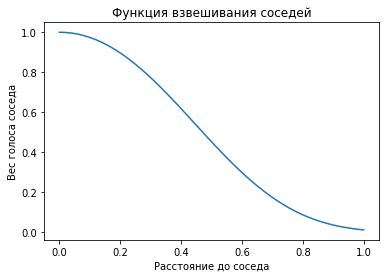

In [33]:
x = np.linspace(0, 1)
plt.plot(x, distance2vote(x))
plt.xlabel('Расстояние до соседа')
plt.ylabel('Вес голоса соседа')
plt.title('Функция взвешивания соседей')

In [34]:
words, vectors, synset_ids = [], [], []

for synset in tqdm(wn.synsets):
    if synset.part_of_speech != 'V':
        continue
    for sense in synset.senses:
        words.append(sense.name)
        vectors.append(vectorize(sense.name))
        synset_ids.append(synset.id)
        
vectors = np.stack(vectors)

  0%|          | 0/59905 [00:00<?, ?it/s]

In [35]:
tree = KDTree(vectors)

In [36]:
for theme_id, labels_set in enumerate(labels):
    print(f'Topic #{theme_id}: {labels_set}')
    for label in labels_set.split(' '):
        print(f'Label: {label}')
        votes = Counter()
        try:
            dists, ids = tree.query(vectorize(label).reshape(1, -1), k=3)
        except:
            continue
        for idx, distance in zip(ids[0], dists[0]):
            for hyper in wn[synset_ids[idx]].hypernyms:
                votes[hyper.id] += distance2vote(distance)
        for sid, score in votes.most_common(5):
            print(score,  wn[sid].title)

        print('\n')

Topic #0: средства средство деньги
Label: средства
1.2761689547648103 ПЛАТИТЬ (ОТДАВАТЬ ДЕНЬГИ)
0.8469282643244785 ИСТРАТИТЬ, ИЗРАСХОДОВАТЬ
0.42924069044033175 ЗАНЯТИЕ, ДЕЯТЕЛЬНОСТЬ
0.42924069044033175 ДЕЙСТВИЕ, ЦЕЛЕНАПРАВЛЕННОЕ ДЕЙСТВИЕ
0.42924069044033175 ПОСРЕДНИЧЕСКАЯ ДЕЯТЕЛЬНОСТЬ


Label: средство
0.637629079091071 РАЗМЕСТИТЬСЯ
0.637629079091071 ВОЙТИ ВНУТРЬ
0.27123867799409945 ПОМЕСТИТЬ, НАЙТИ МЕСТО


Label: деньги
0.3767488976190605 ОТДАТЬ, ДАТЬ, ПРЕДОСТАВИТЬ
0.32666473543600033 ВЛОЖЕНИЕ ФИНАНСОВЫХ СРЕДСТВ
0.3217244288173349 КОЛЛЕКЦИОНИРОВАНИЕ


Topic #1: суд статья суд
Label: суд
0.7875446832196096 ВЫНЕСТИ СУДЕБНОЕ РЕШЕНИЕ
0.37007637630981854 СЧИТАТЬ, ПРИЗНАВАТЬ КЕМ, ЧЕМ-ЛИБО
0.32129119626804264 ВЫСКАЗАТЬ


Label: статья
0.07015702485075766 ИСПРАВИТЬ НЕДОСТАТКИ, ОШИБКИ
0.03974282648986441 КВАЛИФИКАЦИЯ ПРЕСТУПЛЕНИЯ


Label: суд
0.7875446832196096 ВЫНЕСТИ СУДЕБНОЕ РЕШЕНИЕ
0.37007637630981854 СЧИТАТЬ, ПРИЗНАВАТЬ КЕМ, ЧЕМ-ЛИБО
0.32129119626804264 ВЫСКАЗАТЬ


Topic #2: ст закона дне

C:\conda\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\conda\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\conda\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\conda\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.09820764103480169 ПРАВОНАРУШЕНИЕ


Label: дней
0.017686444466518365 ПРОЙТИ (ПРЕКРАТИТЬСЯ О ВРЕМЕНИ, ДЛЯЩЕМСЯ)
0.017686444466518365 ТЕЧЕНИЕ ВРЕМЕНИ
0.013482880864292932 ПРОПАСТЬ КУДА-ТО


Topic #3: ст года дней
Label: ст
Label: года
0.04122334272743351 ОСТАВИТЬ В ПРЕЖНЕМ СОСТОЯНИИ
0.016719104775333615 ОТНОШЕНИЕ МЕЖДУ СУЩНОСТЯМИ
0.016719104775333615 ЗАВИСИМОСТЬ (ОТНОШЕНИЕ)


Label: дней
0.017686444466518365 ПРОЙТИ (ПРЕКРАТИТЬСЯ О ВРЕМЕНИ, ДЛЯЩЕМСЯ)
0.017686444466518365 ТЕЧЕНИЕ ВРЕМЕНИ
0.013482880864292932 ПРОПАСТЬ КУДА-ТО


Topic #4: пункт пункты лица
Label: пункт
0.46769972139440363 ИСПРАВИТЬ НЕДОСТАТКИ, ОШИБКИ


Label: пункты
0.05316665979532616 ИСПРАВИТЬ НЕДОСТАТКИ, ОШИБКИ


Label: лица
0.4110997209230913 УНИЧТОЖИТЬ, ПРЕКРАТИТЬ СУЩЕСТВОВАНИЕ
0.4110997209230913 УБИТЬ, ЛИШИТЬ ЖИЗНИ


Topic #5: года сна года
Label: года
0.04122334272743351 ОСТАВИТЬ В ПРЕЖНЕМ СОСТОЯНИИ
0.016719104775333615 ОТНОШЕНИЕ МЕЖДУ СУЩНОСТЯМИ
0.016719104775333615 ЗАВИСИМОСТЬ (ОТНОШЕНИЕ)


Label: сна
0.82280824333

In [ ]:
word = str(input())

votes = Counter()
dists, ids = tree.query(vectorize(word).reshape(1, -1), k=10)
for idx, distance in zip(ids[0], dists[0]):
    for hyper in wn[synset_ids[idx]].hypernyms:
        votes[hyper.id] += distance2vote(distance)
    print(words[idx], [t.title for t in wn[synset_ids[idx]].hypernyms])

In [ ]:
with open('text_10_words.txt', 'w') as w:
    for t in topics_10_words:
        w.write(str(t))
        w.write('\n')